### Life cycle of data science project
- Data Analysis 
- Feature Engineering 
- Feature Selection 
- model building 
- model deployment

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# display all the columns in dataset
pd.set_option('display.max_columns',None)


In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### In data analysis we will analyse the data to find out 
 1) missing data 
 
 2) all the numerical variables 
 
 3) categorical variables
 
 4) Distribution of numerical variables
 
 5) cardinality of categorical variables
 
 6) outliers 
 
 7) relation betweeen dependent and independent variables 

### Lets see how much percent pf missing data in each column have

In [7]:
features_with_na = [features for features in df.columns if df[features].isnull().sum() > 0]

for feature in features_with_na:
    print(feature,np.round((df[feature].isnull().mean()*100),4),'% missing value')

LotFrontage 17.7397 % missing value
Alley 93.7671 % missing value
MasVnrType 0.5479 % missing value
MasVnrArea 0.5479 % missing value
BsmtQual 2.5342 % missing value
BsmtCond 2.5342 % missing value
BsmtExposure 2.6027 % missing value
BsmtFinType1 2.5342 % missing value
BsmtFinType2 2.6027 % missing value
Electrical 0.0685 % missing value
FireplaceQu 47.2603 % missing value
GarageType 5.5479 % missing value
GarageYrBlt 5.5479 % missing value
GarageFinish 5.5479 % missing value
GarageQual 5.5479 % missing value
GarageCond 5.5479 % missing value
PoolQC 99.5205 % missing value
Fence 80.7534 % missing value
MiscFeature 96.3014 % missing value


#### From the below graph , we are trying to visualize wether there is any relationship between missing values and target variable

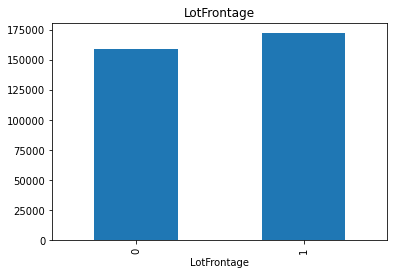

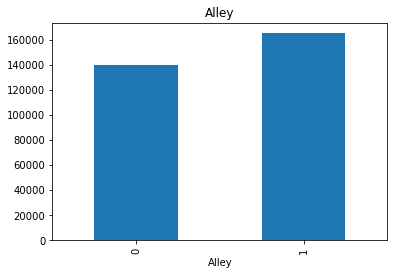

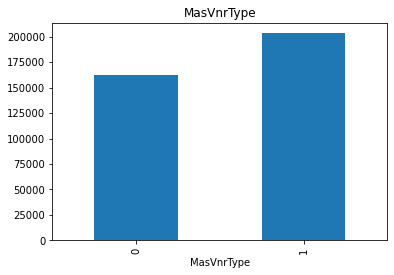

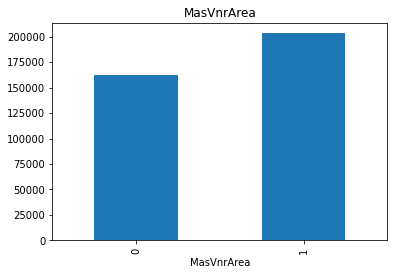

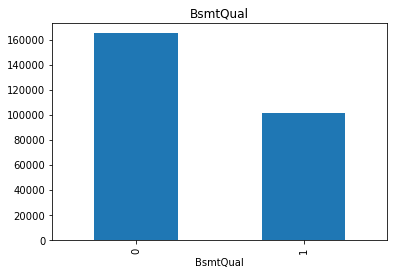

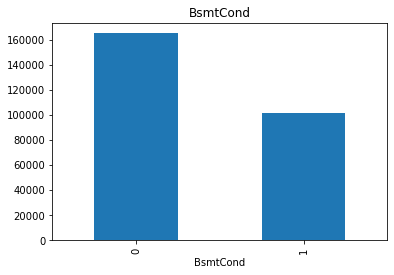

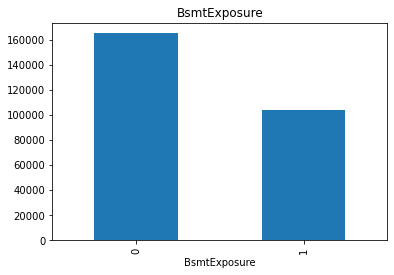

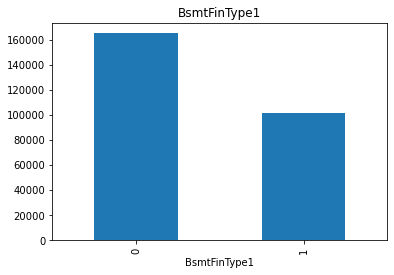

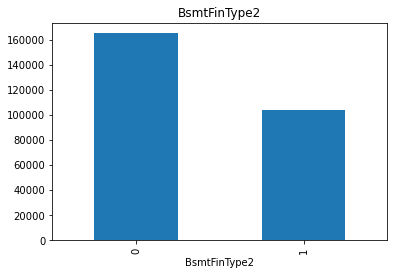

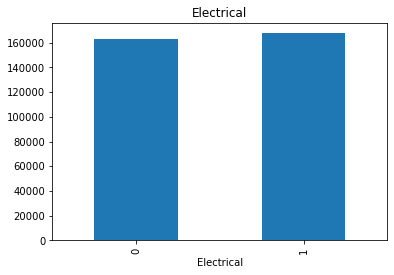

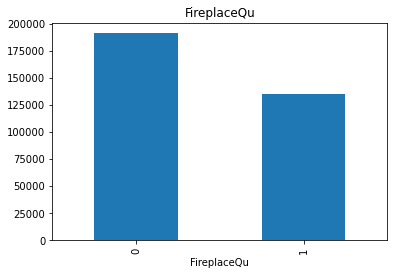

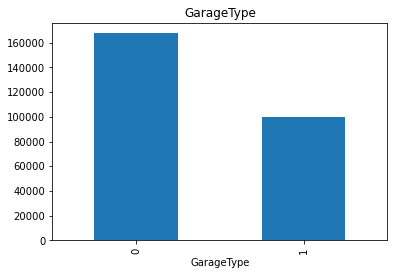

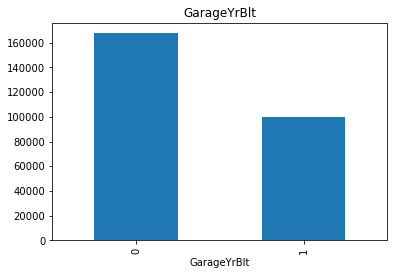

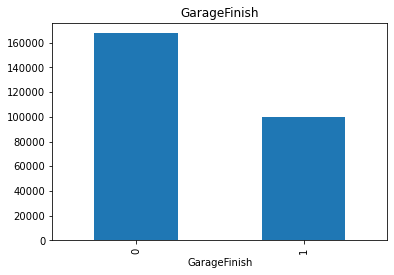

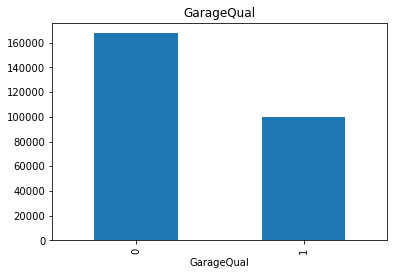

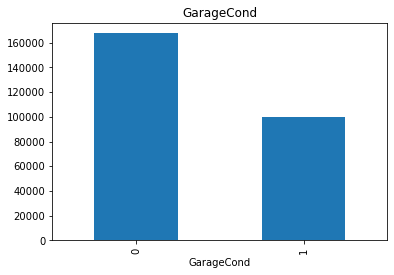

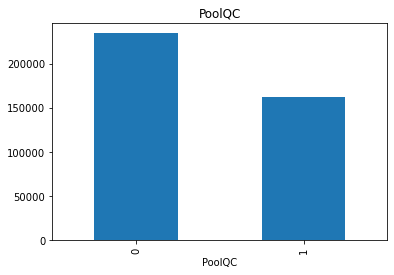

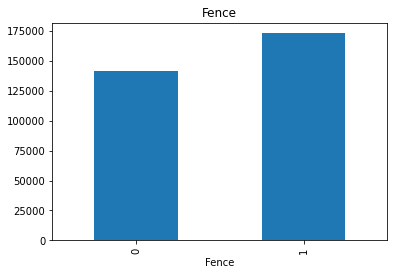

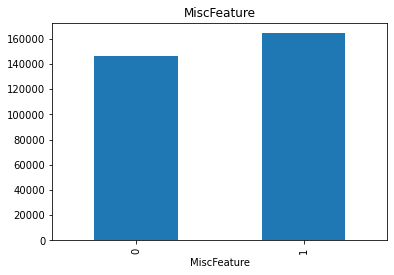

In [8]:
# now we will plot the graph and visualize the things

df = df.copy()

for feature in features_with_na:
    df[feature] = np.where(df[feature].isnull(),1,0)     # here we are imputing 1 value where data is missing and 0 where data is present 
    df.groupby(feature)['SalePrice'].median().plot.bar() # lets calculate the mean salesprice where the data is missing or present 
    plt.title(feature)
    plt.show()

#### So we need to replace the NAN value with something meanful value , as NAN plays vital role for deciding SalePrice

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,0,8450,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,706,0,0,150,856,GasA,Ex,Y,0,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,0,0,0,2,548,0,0,Y,0,61,0,0,0,0,1,1,1,0,2,2008,WD,Normal,208500
1,2,20,RL,0,9600,Pave,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0,0,TA,TA,CBlock,0,0,0,0,978,0,0,284,1262,GasA,Ex,Y,0,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,0,0,0,0,2,460,0,0,Y,298,0,0,0,0,0,1,1,1,0,5,2007,WD,Normal,181500
2,3,60,RL,0,11250,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,486,0,0,434,920,GasA,Ex,Y,0,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,0,0,0,0,2,608,0,0,Y,0,42,0,0,0,0,1,1,1,0,9,2008,WD,Normal,223500
3,4,70,RL,0,9550,Pave,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0,0,TA,TA,BrkTil,0,0,0,0,216,0,0,540,756,GasA,Gd,Y,0,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,0,0,0,0,3,642,0,0,Y,0,35,272,0,0,0,1,1,1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,0,14260,Pave,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,655,0,0,490,1145,GasA,Ex,Y,0,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,0,0,0,0,3,836,0,0,Y,192,84,0,0,0,0,1,1,1,0,12,2008,WD,Normal,250000


From the above dataset  id is not required , SO we can drop that column 

In [10]:
df.drop(['Id'],axis=1,inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,0,8450,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,706,0,0,150,856,GasA,Ex,Y,0,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,1,0,0,0,2,548,0,0,Y,0,61,0,0,0,0,1,1,1,0,2,2008,WD,Normal,208500
1,20,RL,0,9600,Pave,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0,0,TA,TA,CBlock,0,0,0,0,978,0,0,284,1262,GasA,Ex,Y,0,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,0,0,0,0,2,460,0,0,Y,298,0,0,0,0,0,1,1,1,0,5,2007,WD,Normal,181500
2,60,RL,0,11250,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,486,0,0,434,920,GasA,Ex,Y,0,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,0,0,0,0,2,608,0,0,Y,0,42,0,0,0,0,1,1,1,0,9,2008,WD,Normal,223500
3,70,RL,0,9550,Pave,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0,0,TA,TA,BrkTil,0,0,0,0,216,0,0,540,756,GasA,Gd,Y,0,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,0,0,0,0,3,642,0,0,Y,0,35,272,0,0,0,1,1,1,0,2,2006,WD,Abnorml,140000
4,60,RL,0,14260,Pave,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,655,0,0,490,1145,GasA,Ex,Y,0,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,0,0,0,0,3,836,0,0,Y,192,84,0,0,0,0,1,1,1,0,12,2008,WD,Normal,250000


In [11]:
dataset = df.copy()

now we have to see , how many are numerical columns in df

In [12]:
numerical_columns = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(len(numerical_columns))
df[numerical_columns]

53


,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,0,8450,1,7,5,2003,2003,0,0,0,0,0,0,706,0,0,150,856,0,856,854,0,1710,1,0,2,1,3,1,8,0,1,0,0,0,2,548,0,0,0,61,0,0,0,0,1,1,1,0,2,2008,208500
1,20,0,9600,1,6,8,1976,1976,0,0,0,0,0,0,978,0,0,284,1262,0,1262,0,0,1262,0,1,2,0,3,1,6,1,0,0,0,0,2,460,0,0,298,0,0,0,0,0,1,1,1,0,5,2007,181500
2,60,0,11250,1,7,5,2001,2002,0,0,0,0,0,0,486,0,0,434,920,0,920,866,0,1786,1,0,2,1,3,1,6,1,0,0,0,0,2,608,0,0,0,42,0,0,0,0,1,1,1,0,9,2008,223500
3,70,0,9550,1,7,5,1915,1970,0,0,0,0,0,0,216,0,0,540,756,0,961,756,0,1717,1,0,1,0,3,1,7,1,0,0,0,0,3,642,0,0,0,35,272,0,0,0,1,1,1,0,2,2006,140000
4,60,0,14260,1,8,5,2000,2000,0,0,0,0,0,0,655,0,0,490,1145,0,1145,1053,0,2198,1,0,2,1,4,1,9,1,0,0,0,0,3,836,0,0,192,84,0,0,0,0,1,1,1,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,0,7917,1,6,5,1999,2000,0,0,0,0,0,0,0,0,0,953,953,0,953,694,0,1647,0,0,2,1,3,1,7,1,0,0,0,0,2,460,0,0,0,40,0,0,0,0,1,1,1,0,8,2007,175000
1456,20,0,13175,1,6,6,1978,1988,0,0,0,0,0,0,790,0,163,589,1542,0,2073,0,0,2073,1,0,2,0,3,1,7,2,0,0,0,0,2,500,0,0,349,0,0,0,0,0,1,0,1,0,2,2010,210000
1457,70,0,9042,1,7,9,1941,2006,0,0,0,0,0,0,275,0,0,877,1152,0,1188,1152,0,2340,0,0,2,0,4,1,9,2,0,0,0,0,1,252,0,0,0,60,0,0,0,0,1,0,0,2500,5,2010,266500
1458,20,0,9717,1,5,6,1950,1996,0,0,0,0,0,0,49,0,1029,0,1078,0,1078,0,0,1078,1,0,1,0,2,1,5,0,1,0,0,0,1,240,0,0,366,0,112,0,0,0,1,1,1,0,4,2010,142125


#### Now we have several year columns from which we ahve to extract the info. by converting them in no.of days or no,of weeks likeweise

In [13]:
year_features = [feature for feature in numerical_columns if 'Yr' in feature  or 'Year' in feature]
year_features
    

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
for feature in year_features:
    print(feature,df[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [0 1]
YrSold [2008 2007 2006 2009 2010]


#### now lets plot the graph and see wether there is any relationship between year_features and target variables(SalePrice)

Text(0.5, 1.0, 'yr_sold vs SalePrice')

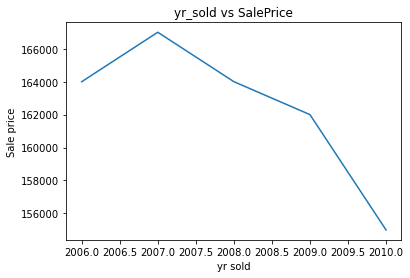

In [15]:
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('yr sold')
plt.ylabel('Sale price')
plt.title('yr_sold vs SalePrice')

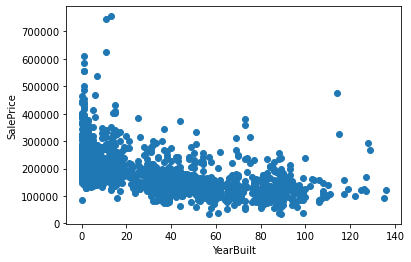

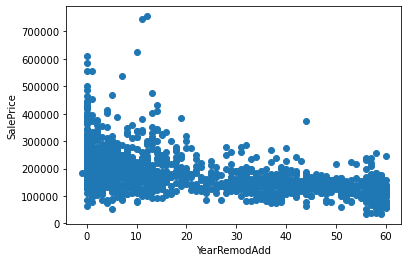

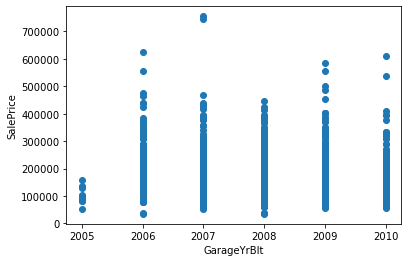

In [16]:

for feature in year_features:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [17]:

## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_columns if len(dataset[feature].unique())<25 and feature not in year_features]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 35


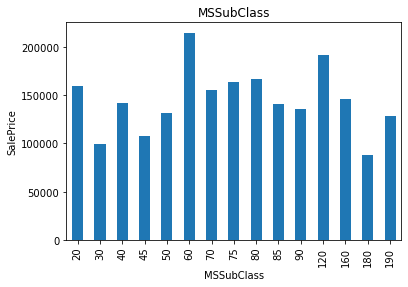

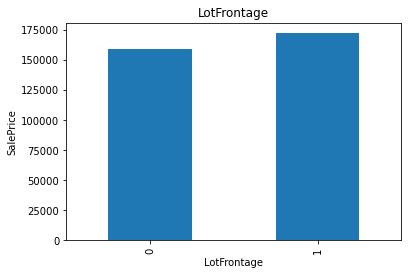

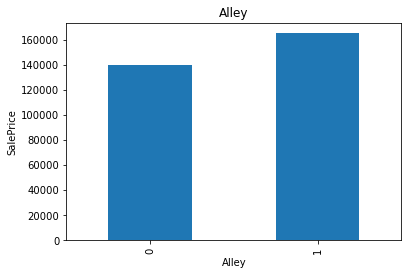

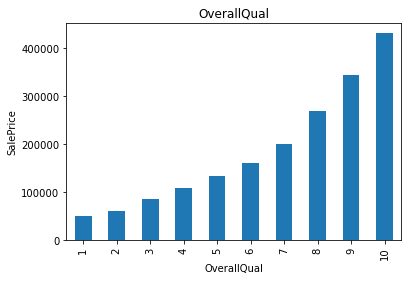

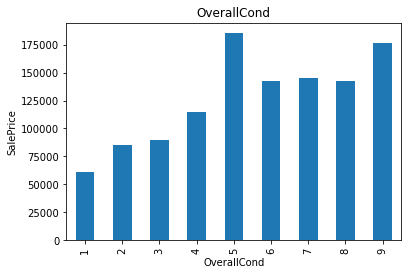

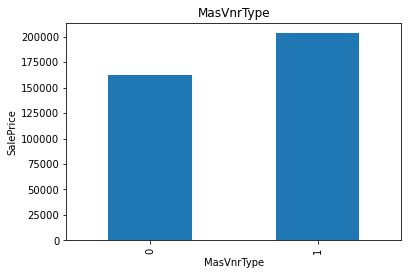

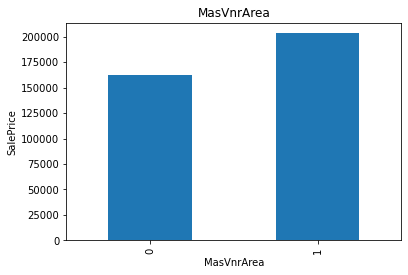

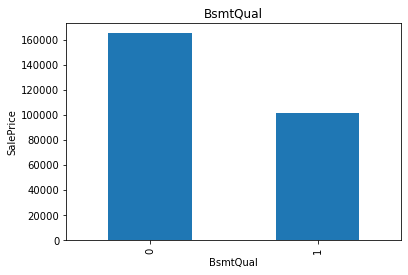

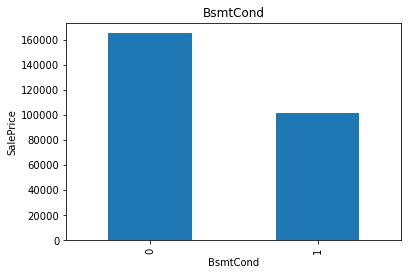

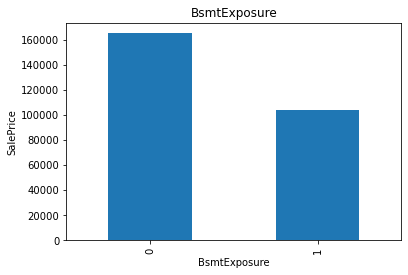

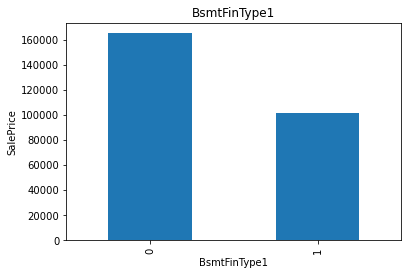

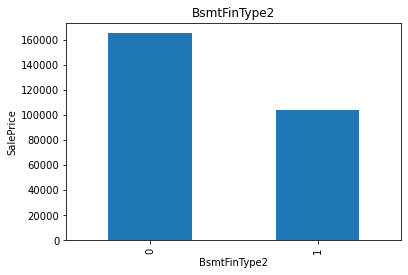

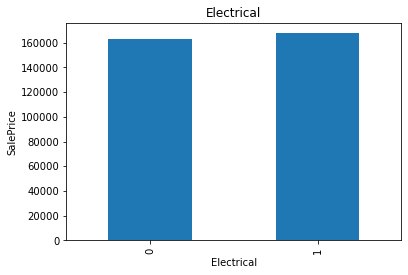

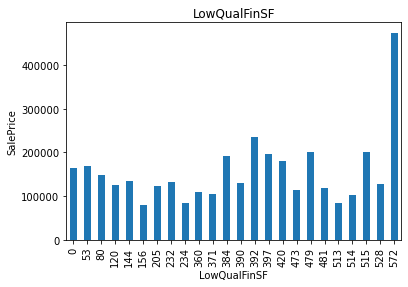

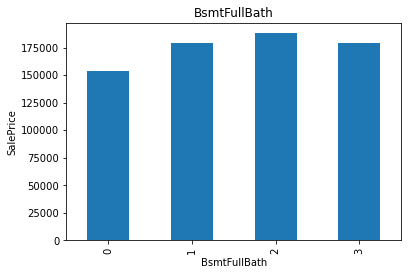

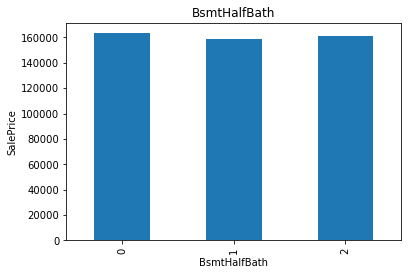

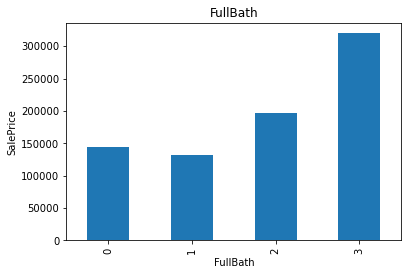

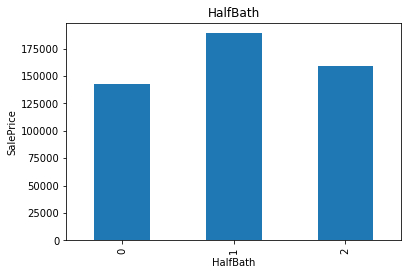

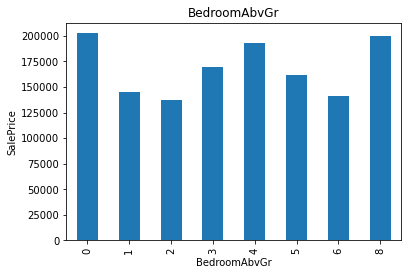

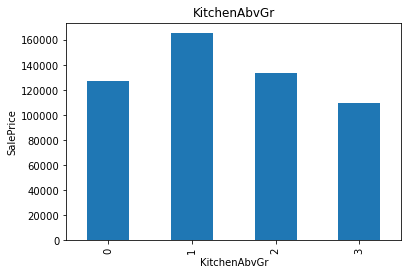

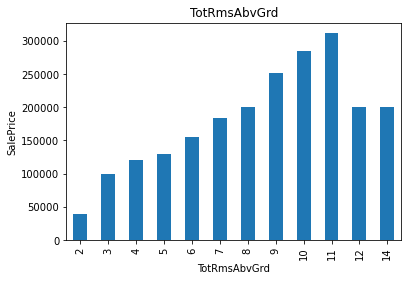

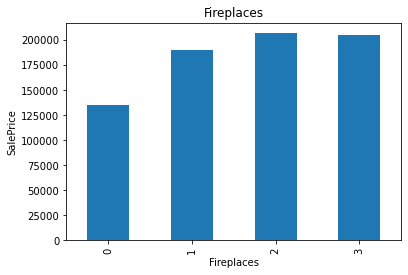

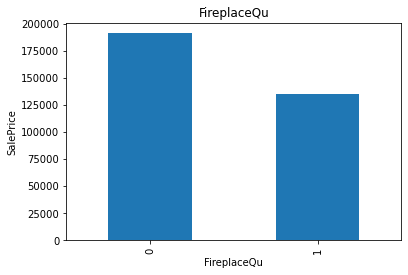

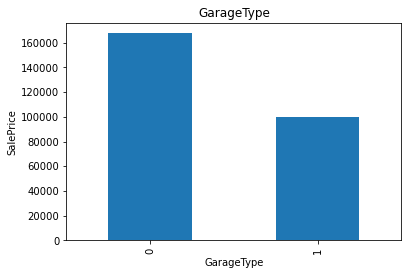

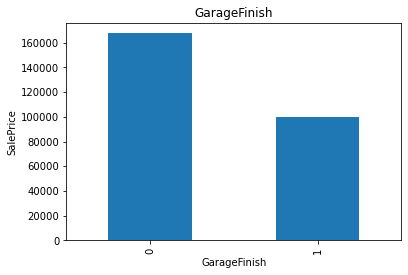

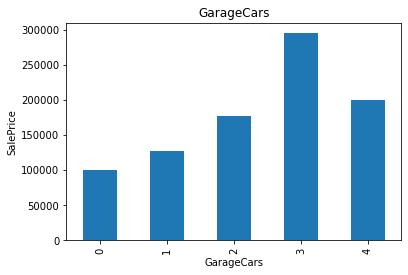

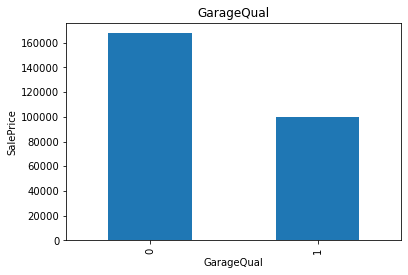

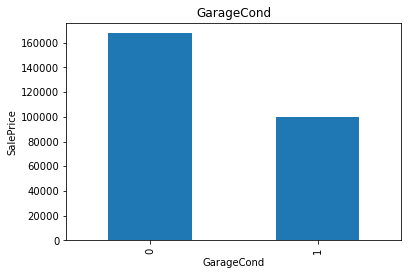

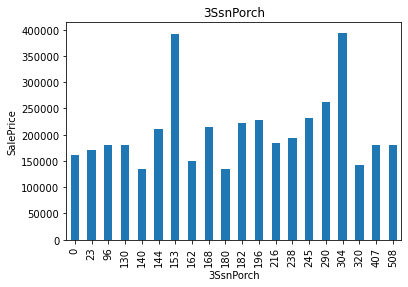

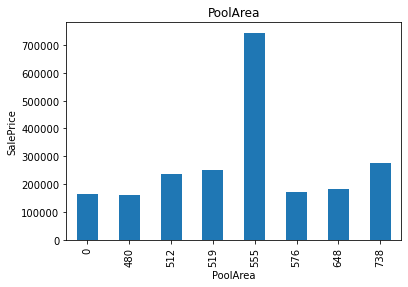

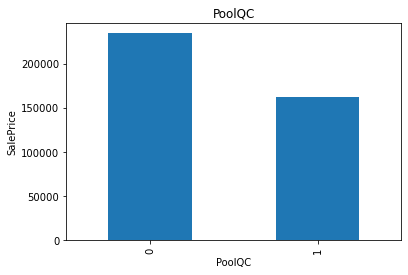

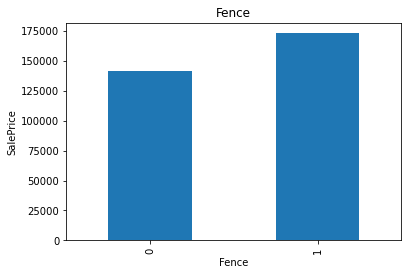

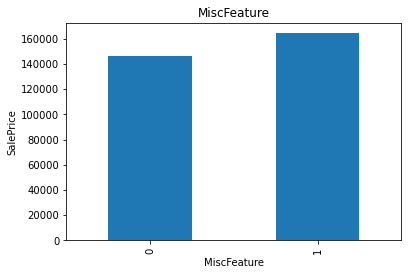

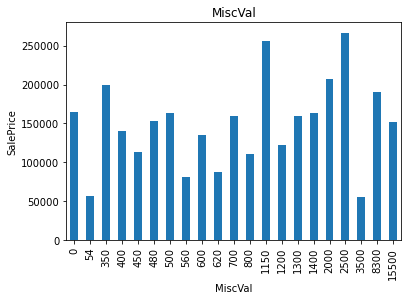

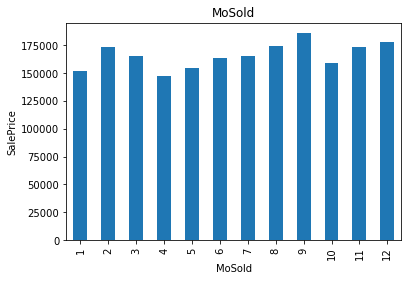

In [18]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [19]:

continuous_feature=[feature for feature in numerical_columns if feature not in discrete_feature+year_features]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 14


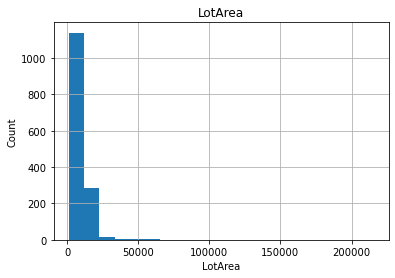

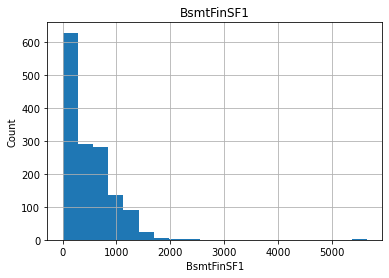

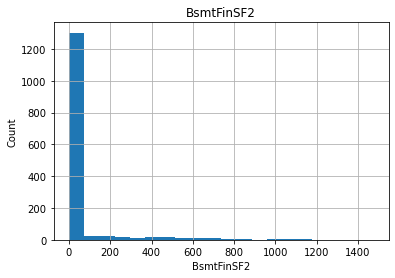

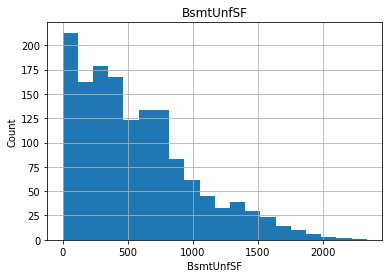

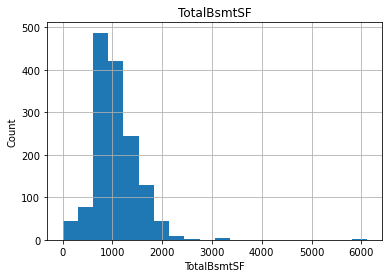

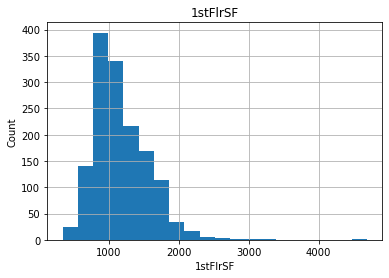

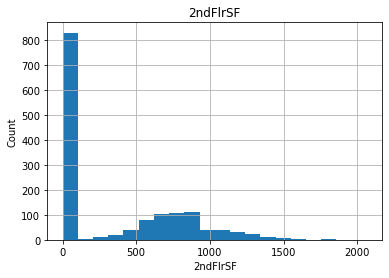

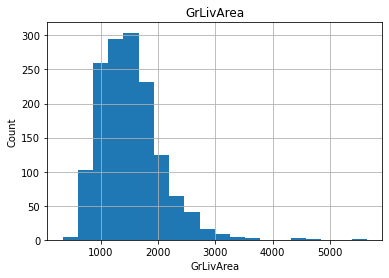

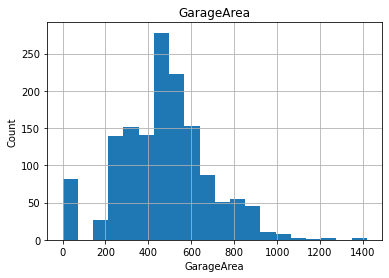

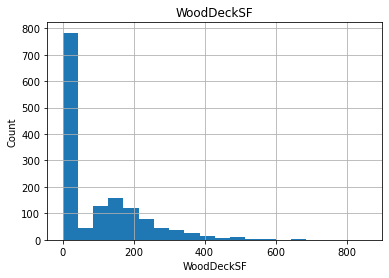

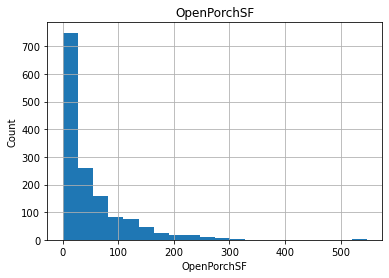

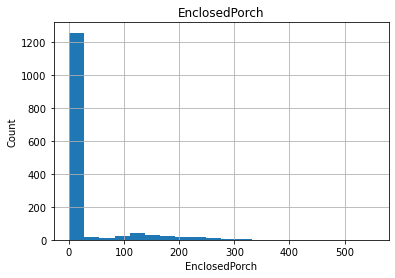

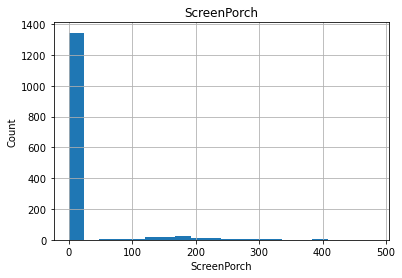

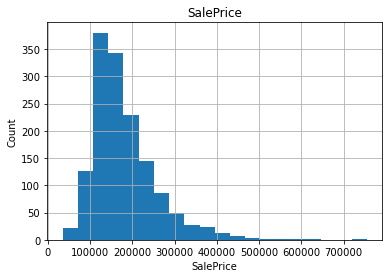

In [20]:
for feature in continuous_feature:
    df[feature].hist(bins=20)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

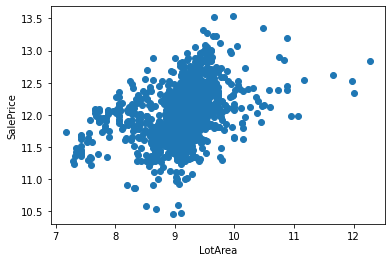

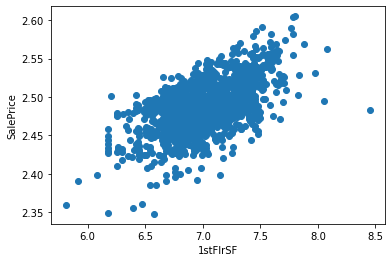

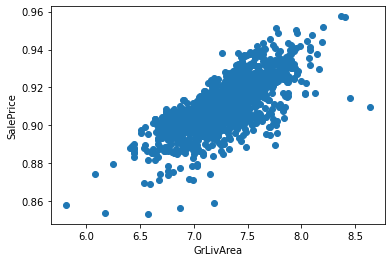

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


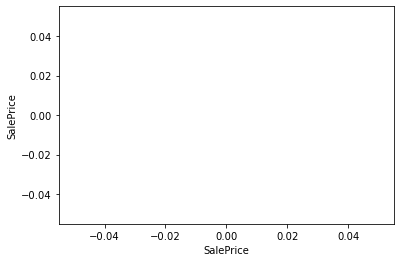

In [21]:
# now we have to transform our Non gaussian distributed data 
# to gaussian distributed by using LOGARTIHMIC TRANSFORMATION

for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df['SalePrice'] = np.log(df['SalePrice'])
        plt.scatter(df[feature],df['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()

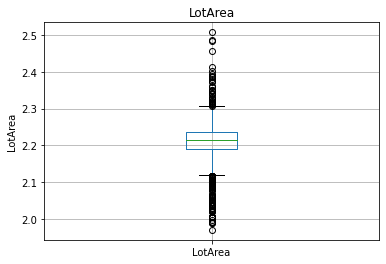

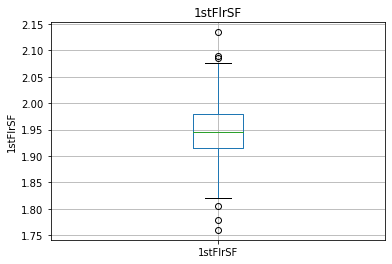

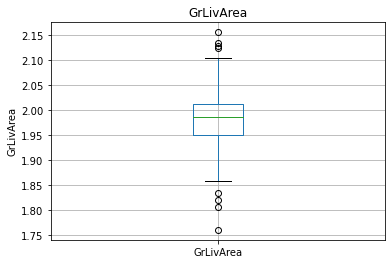

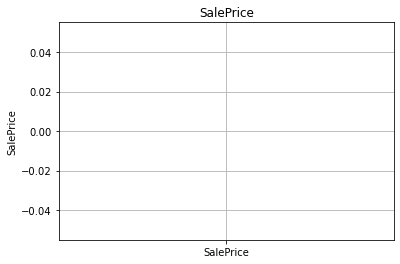

In [22]:
# we are finding the outliers using box plot
for feature in continuous_feature:
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [23]:
# categorical variables
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print(categorical_feature)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [24]:
df[categorical_feature].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


In [25]:
# finding unique categories in each categorical feature/column
for feature in categorical_feature:
    print('Feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

Feature is MSZoning and number of categories are 5
Feature is Street and number of categories are 2
Feature is LotShape and number of categories are 4
Feature is LandContour and number of categories are 4
Feature is Utilities and number of categories are 2
Feature is LotConfig and number of categories are 5
Feature is LandSlope and number of categories are 3
Feature is Neighborhood and number of categories are 25
Feature is Condition1 and number of categories are 9
Feature is Condition2 and number of categories are 8
Feature is BldgType and number of categories are 5
Feature is HouseStyle and number of categories are 8
Feature is RoofStyle and number of categories are 6
Feature is RoofMatl and number of categories are 8
Feature is Exterior1st and number of categories are 15
Feature is Exterior2nd and number of categories are 16
Feature is ExterQual and number of categories are 4
Feature is ExterCond and number of categories are 5
Feature is Foundation and number of categories are 6
Fea

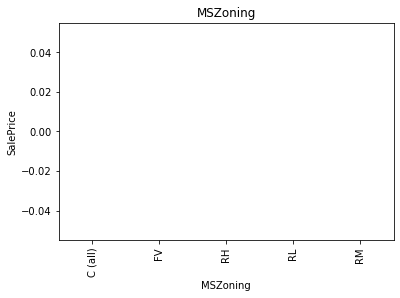

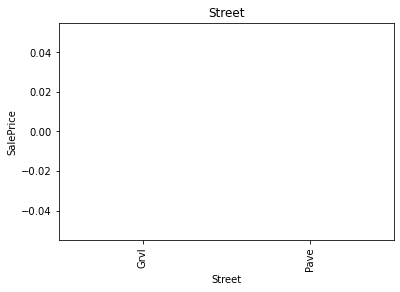

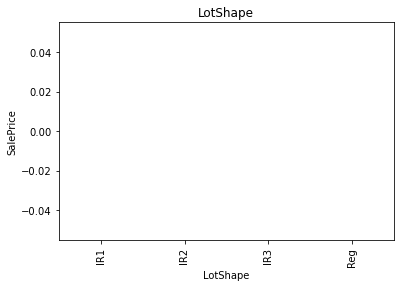

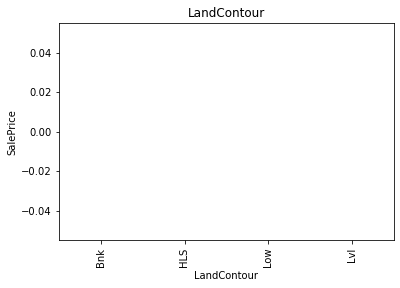

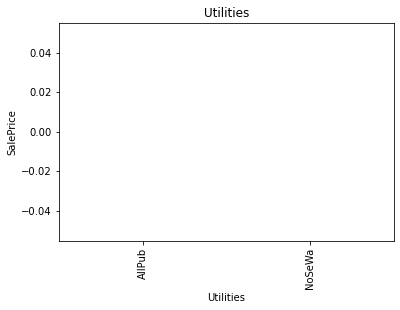

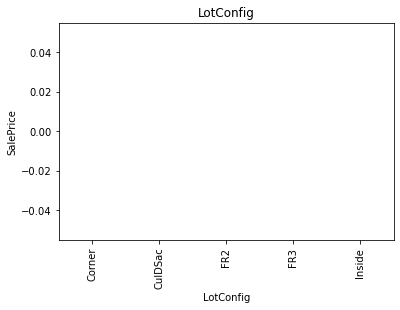

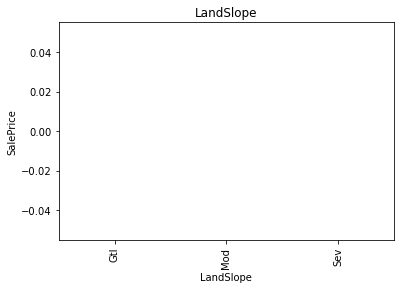

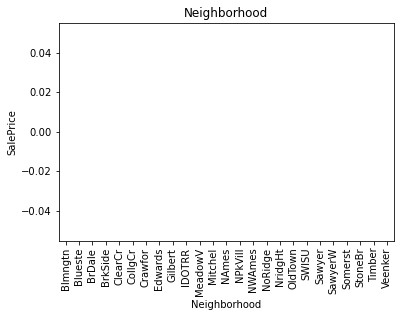

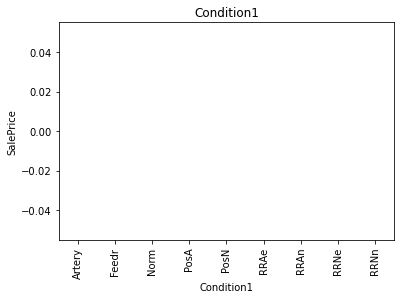

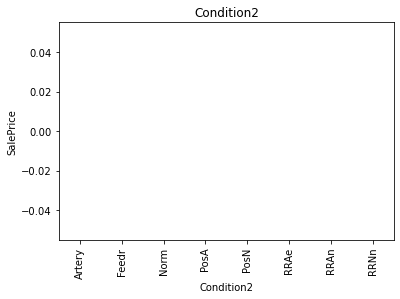

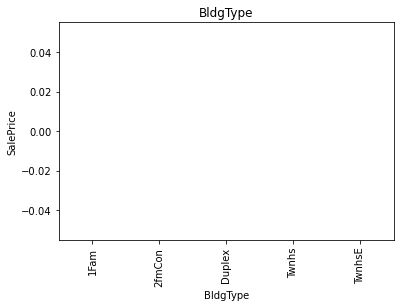

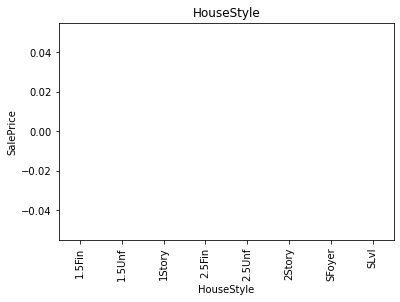

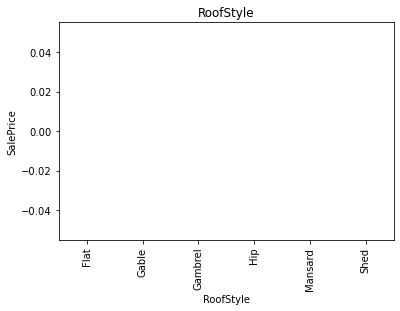

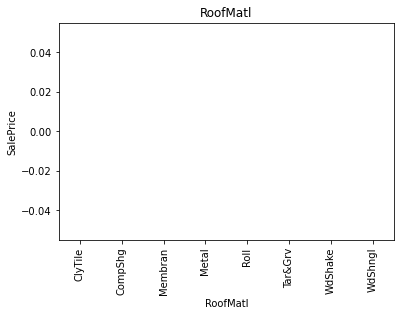

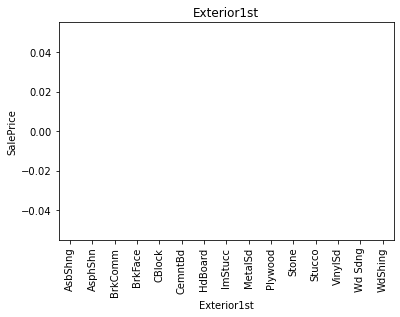

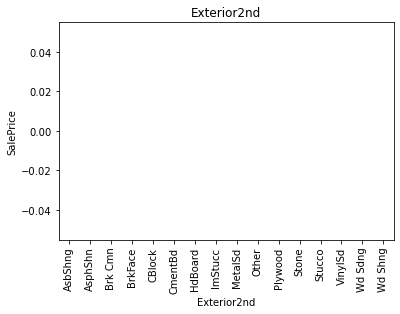

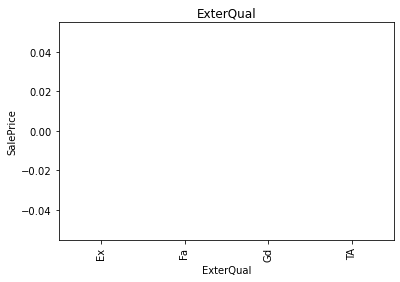

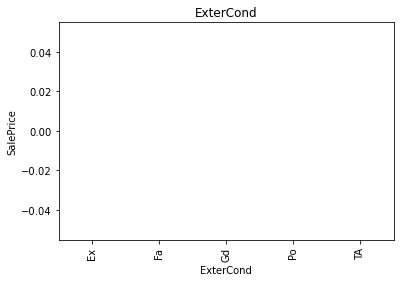

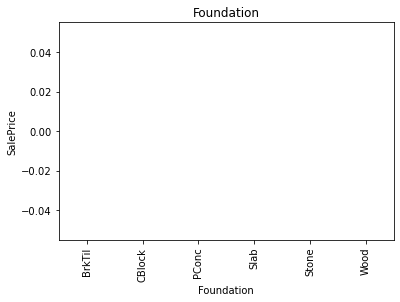

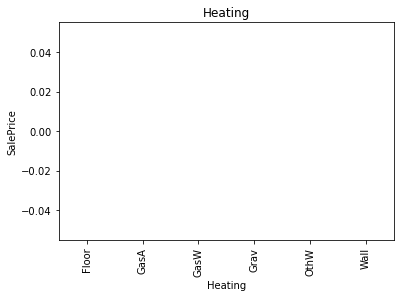

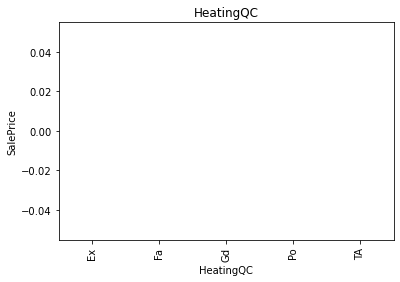

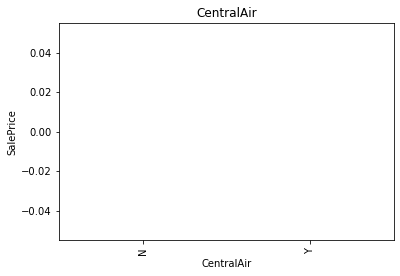

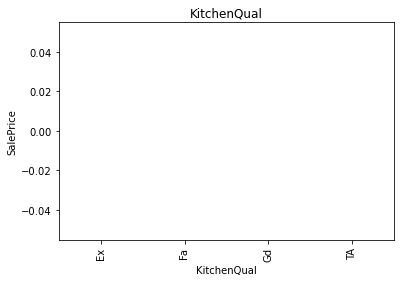

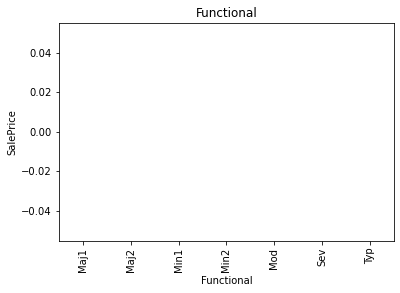

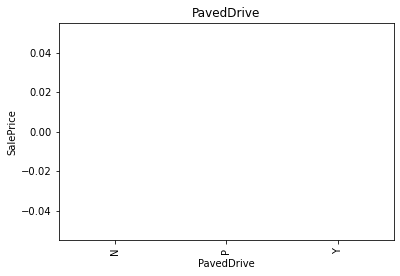

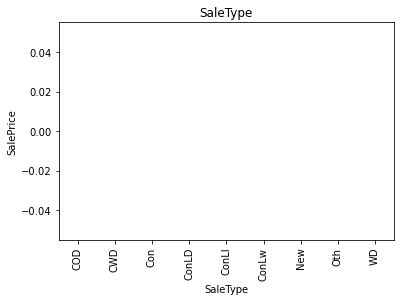

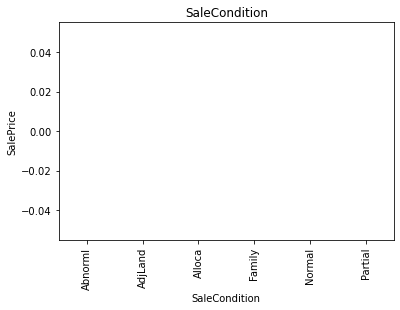

In [26]:
# find the relationship between categorical variable and dependent
# variable (i.e SalePrice)
df=df.copy()
for feature in categorical_feature:
    df.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()